# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [1]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

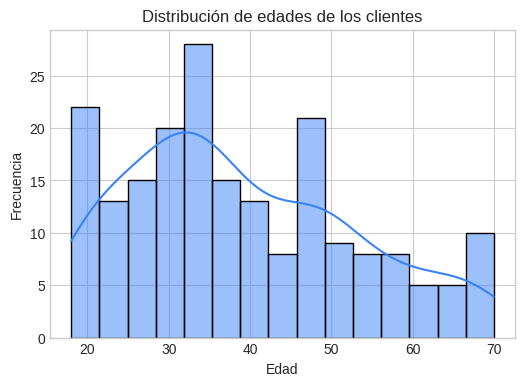

Resumen de 'Age':


,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


In [5]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df["Age"], bins=15, kde=True, ax=ax, color="#3b82f6")
ax.set_title("Distribución de edades de los clientes")
ax.set_xlabel("Edad")
ax.set_ylabel("Frecuencia")
plt.show()

print("Resumen de 'Age':")
display(df["Age"].describe())


### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

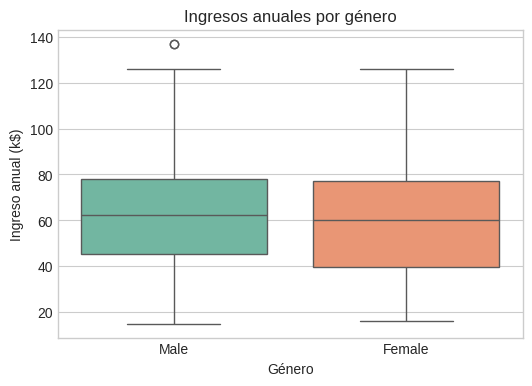

t = 0.793 | p = 0.4289
Resultado: No se detecta diferencia estadísticamente significativa (p ≥ 0.05).


In [6]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(data=df, x="Gender", y="Annual Income (k$)", ax=ax, palette="Set2")
ax.set_title("Ingresos anuales por género")
ax.set_xlabel("Género")
ax.set_ylabel("Ingreso anual (k$)")
plt.show()

from scipy.stats import ttest_ind

male = df.loc[df.Gender.str.lower()=="male","Annual Income (k$)"].dropna()
female = df.loc[df.Gender.str.lower()=="female","Annual Income (k$)"].dropna()

t_stat, p_val = ttest_ind(male, female, equal_var=False)
print(f"t = {t_stat:.3f} | p = {p_val:.4f}")
if p_val < 0.05:
    print("Resultado: Diferencia estadísticamente significativa (p < 0.05).")
else:
    print("Resultado: No se detecta diferencia estadísticamente significativa (p ≥ 0.05).")



### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

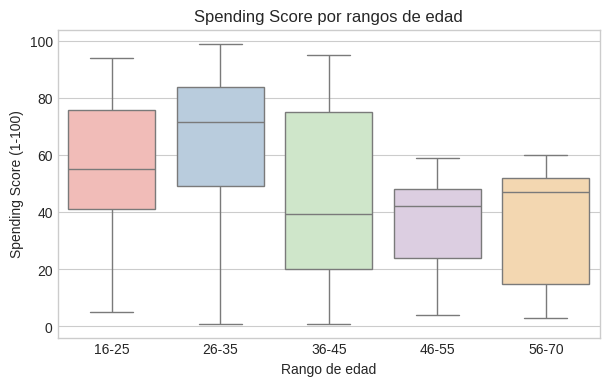

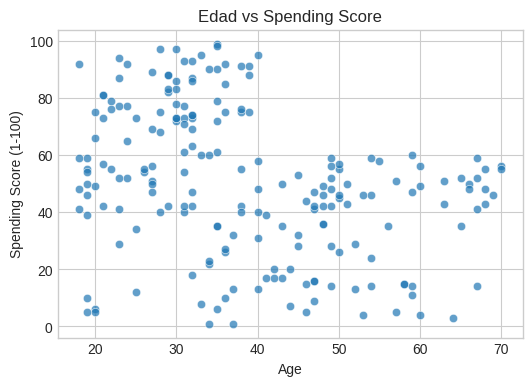

Spearman rho = -0.345 | p = 0.0000


In [7]:
bins = [15, 25, 35, 45, 55, 70]
labels = ["16-25","26-35","36-45","46-55","56-70"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

fig, ax = plt.subplots(figsize=(7,4))
sns.boxplot(data=df, x="AgeGroup", y="Spending Score (1-100)", ax=ax, palette="Pastel1")
ax.set_title("Spending Score por rangos de edad")
ax.set_xlabel("Rango de edad")
ax.set_ylabel("Spending Score (1-100)")
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", ax=ax, alpha=0.7)
ax.set_title("Edad vs Spending Score")
plt.show()

from scipy.stats import spearmanr
rho, p = spearmanr(df["Age"], df["Spending Score (1-100)"])
print(f"Spearman rho = {rho:.3f} | p = {p:.4f}")


### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

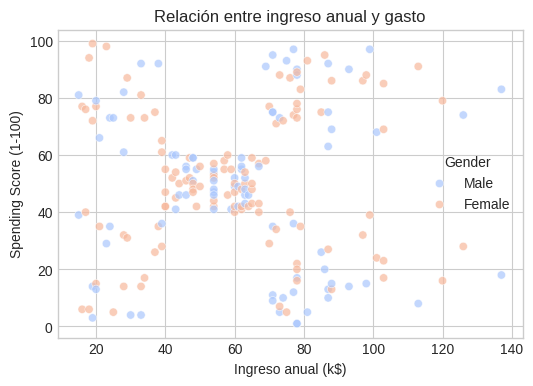

Coeficiente de correlación de Pearson: 0.010
Coeficiente de correlación de Spearman: 0.008
Interpretación: A mayor ingreso, tiende a aumentar el gasto promedio.


In [8]:
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Gender",
    alpha=0.7,
    palette="coolwarm",
    ax=ax
)
ax.set_title("Relación entre ingreso anual y gasto")
ax.set_xlabel("Ingreso anual (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.show()

corr_pearson = df["Annual Income (k$)"].corr(df["Spending Score (1-100)"], method='pearson')
corr_spearman = df["Annual Income (k$)"].corr(df["Spending Score (1-100)"], method='spearman')

print(f"Coeficiente de correlación de Pearson: {corr_pearson:.3f}")
print(f"Coeficiente de correlación de Spearman: {corr_spearman:.3f}")

if corr_pearson > 0:
    print("Interpretación: A mayor ingreso, tiende a aumentar el gasto promedio.")
elif corr_pearson < 0:
    print("Interpretación: A mayor ingreso, tiende a disminuir el gasto promedio.")
else:
    print("Interpretación: No hay correlación lineal entre ingreso y gasto.")


### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

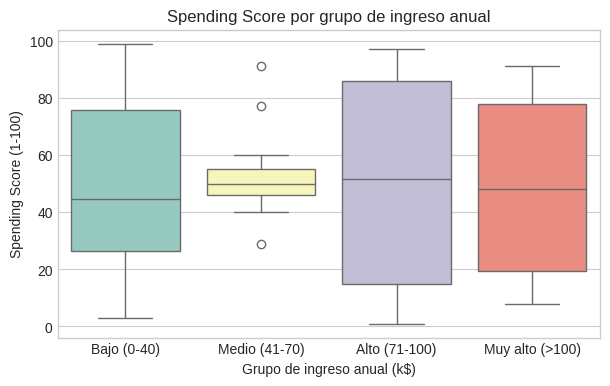

,Spending Score (1-100)
IncomeGroup,
Bajo (0-40),49.48
Medio (41-70),50.68
Alto (71-100),50.52
Muy alto (>100),48.79


In [9]:
bins = [0, 40, 70, 100, 150]
labels = ["Bajo (0-40)", "Medio (41-70)", "Alto (71-100)", "Muy alto (>100)"]
df["IncomeGroup"] = pd.cut(df["Annual Income (k$)"], bins=bins, labels=labels)

fig, ax = plt.subplots(figsize=(7,4))
sns.boxplot(
    data=df,
    x="IncomeGroup",
    y="Spending Score (1-100)",
    palette="Set3",
    ax=ax
)
ax.set_title("Spending Score por grupo de ingreso anual")
ax.set_xlabel("Grupo de ingreso anual (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.show()

promedios = df.groupby("IncomeGroup")["Spending Score (1-100)"].mean().round(2)
display(promedios)


### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

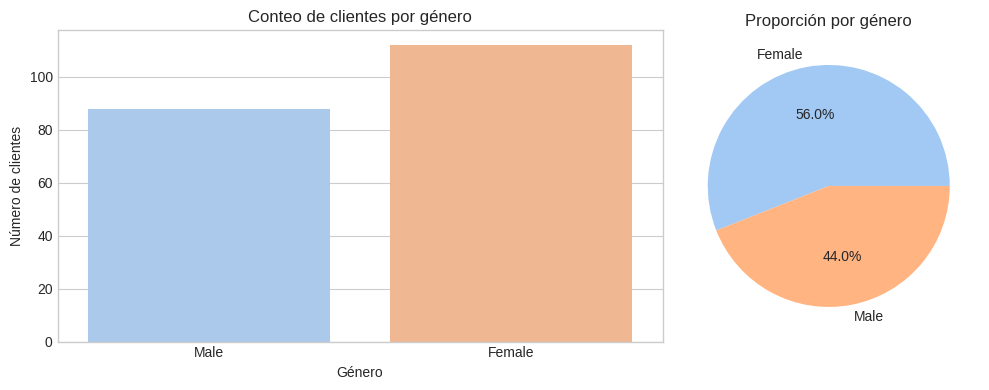

,clientes,pct
Gender,,
Female,112,0.56
Male,88,0.44


In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10,4), gridspec_kw={'width_ratios':[2,1]})

sns.countplot(data=df, x="Gender", palette="pastel", ax=ax[0])
ax[0].set_title("Conteo de clientes por género")
ax[0].set_xlabel("Género"); ax[0].set_ylabel("Número de clientes")

counts = df["Gender"].value_counts()
ax[1].pie(counts.values, labels=counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
ax[1].set_title("Proporción por género")

plt.tight_layout()
plt.show()

display(counts.to_frame("clientes").assign(pct=(counts/len(df)).round(3)))


### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

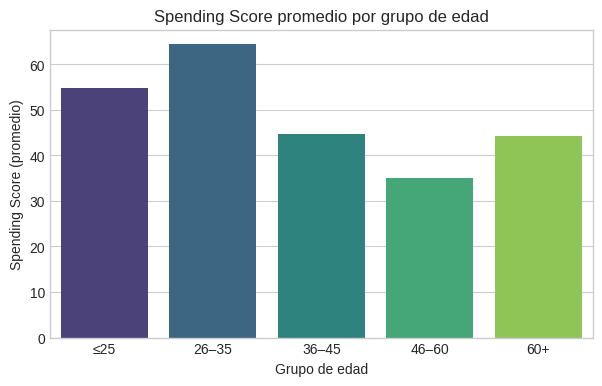

,Spending promedio
AgeGroup,
26–35,64.4
≤25,54.9
36–45,44.8
60+,44.2
46–60,35.1


In [11]:
bins = [0, 25, 35, 45, 60, 100]
labels = ["≤25", "26–35", "36–45", "46–60", "60+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True, include_lowest=True)

mean_spend = (df.groupby("AgeGroup")["Spending Score (1-100)"]
                .mean()
                .round(1)
                .sort_values(ascending=False))

plt.figure(figsize=(7,4))
sns.barplot(x=mean_spend.index, y=mean_spend.values, palette="viridis")
plt.title("Spending Score promedio por grupo de edad")
plt.xlabel("Grupo de edad"); plt.ylabel("Spending Score (promedio)")
plt.show()

display(mean_spend.to_frame("Spending promedio"))


### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

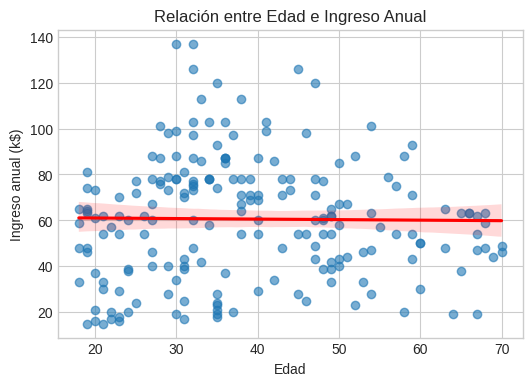

Correlación Pearson: -0.012
Correlación Spearman: 0.020
Interpretación: a mayor edad, tiende a disminuir el ingreso.


In [12]:
plt.figure(figsize=(6,4))
sns.regplot(
    data=df, x="Age", y="Annual Income (k$)",
    scatter_kws={"alpha":0.6}, line_kws={"color":"red"}
)
plt.title("Relación entre Edad e Ingreso Anual")
plt.xlabel("Edad"); plt.ylabel("Ingreso anual (k$)")
plt.show()

pear = df["Age"].corr(df["Annual Income (k$)"], method="pearson")
spear = df["Age"].corr(df["Annual Income (k$)"], method="spearman")
print(f"Correlación Pearson: {pear:.3f}")
print(f"Correlación Spearman: {spear:.3f}")

if pear > 0:
    print("Interpretación: a mayor edad, tiende a aumentar el ingreso.")
elif pear < 0:
    print("Interpretación: a mayor edad, tiende a disminuir el ingreso.")
else:
    print("Interpretación: no se observa relación lineal clara.")


### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

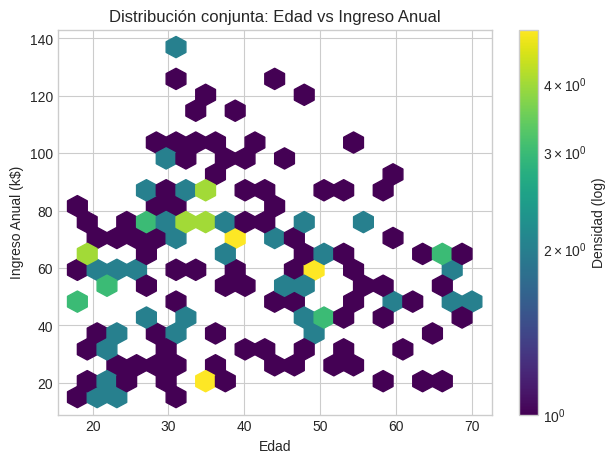

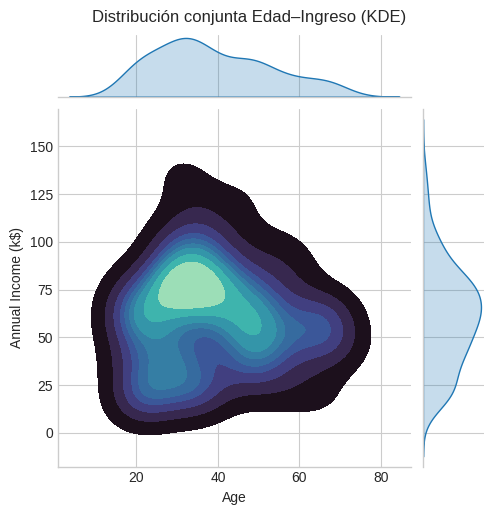

In [13]:
plt.figure(figsize=(7,5))

plt.hexbin(
    df["Age"],
    df["Annual Income (k$)"],
    gridsize=20,
    cmap="viridis",
    bins='log'
)

plt.colorbar(label="Densidad (log)")
plt.title("Distribución conjunta: Edad vs Ingreso Anual")
plt.xlabel("Edad")
plt.ylabel("Ingreso Anual (k$)")
plt.show()

sns.jointplot(
    data=df,
    x="Age",
    y="Annual Income (k$)",
    kind="kde",
    fill=True,
    cmap="mako",
    height=5
)
plt.suptitle("Distribución conjunta Edad–Ingreso (KDE)", y=1.02)
plt.show()


### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

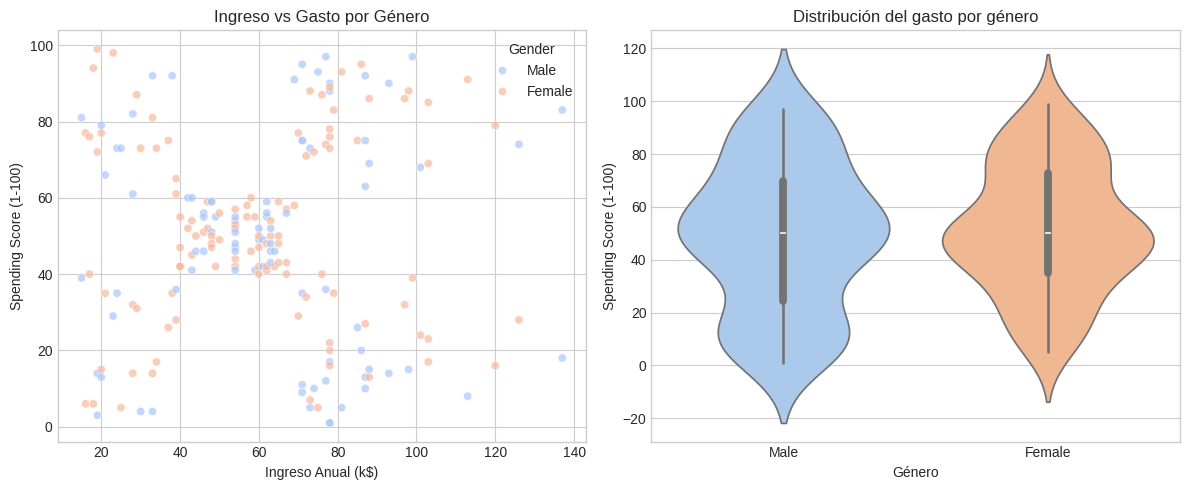

,Spending Score (1-100)
Gender,
Female,51.53
Male,48.51


In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(
    data=df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Gender",
    palette="coolwarm",
    alpha=0.7,
    ax=ax[0]
)
ax[0].set_title("Ingreso vs Gasto por Género")
ax[0].set_xlabel("Ingreso Anual (k$)")
ax[0].set_ylabel("Spending Score (1-100)")

sns.violinplot(
    data=df,
    x="Gender",
    y="Spending Score (1-100)",
    palette="pastel",
    ax=ax[1]
)
ax[1].set_title("Distribución del gasto por género")
ax[1].set_xlabel("Género")
ax[1].set_ylabel("Spending Score (1-100)")

plt.tight_layout()
plt.show()

df.groupby("Gender")["Spending Score (1-100)"].mean().round(2)
